In [102]:
dt = 0.01; T = 200

200

In [110]:
function interval_time(r::Real, N::Int64; t_max=200, max_spike = 200, dt = 0.01)
    intervals = -log.(1 .- rand(N)) ./ r;
    outsipke_time = cumsum(intervals);
    return [0:dt:t_max...], [sum(outsipke_time .< t .<= (outsipke_time .+ 0.1)) == 1 ? max_spike : 0 for t in 0:dt:t_max];
end

interval_time (generic function with 2 methods)

In [124]:
_,outspikes = interval_time(0.08,1000)

([0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09  …  199.91, 199.92, 199.93, 199.94, 199.95, 199.96, 199.97, 199.98, 199.99, 200.0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

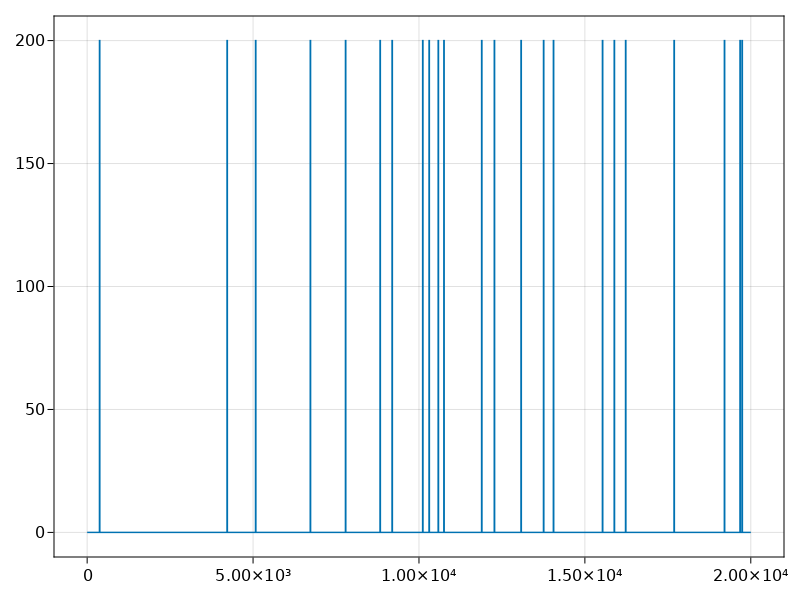

In [104]:
t = [0:dt:T...]
interval_t = interval_time(0.03,1000);

out_spikes = [sum(interval_t .< i .<= (interval_t .+ 0.1)) == 1 ? 200 : 0 for i in 0:dt:T]

20001-element Vector{Int64}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0

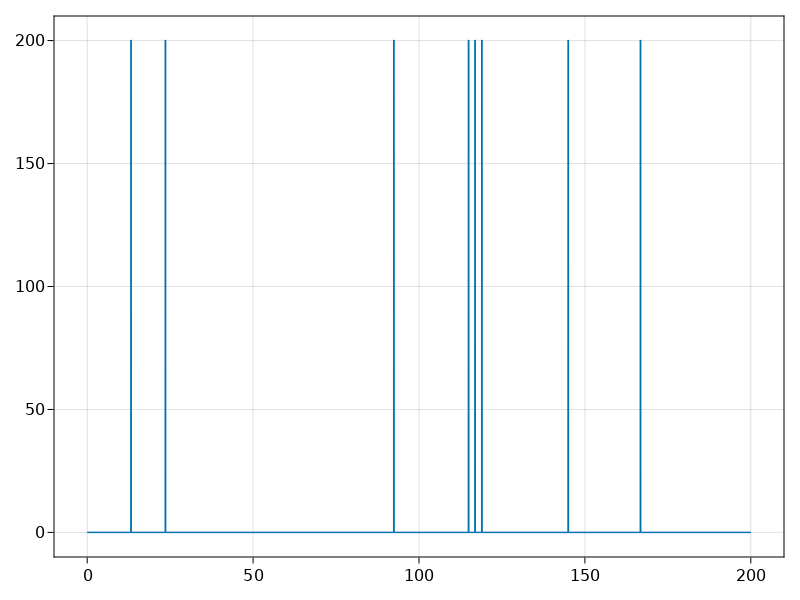

In [106]:
lines(t, out_spikes)

In [53]:
plot([0:0.01:200...], )

0.0006209958814906713

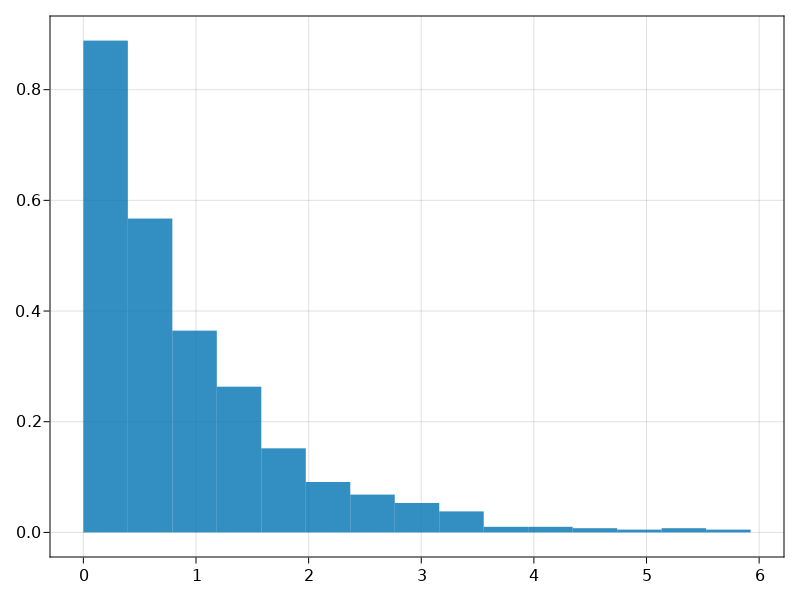

In [25]:
r = 1

f = Figure()
ax = Axis(f[1, 1])
hist!(ax, -log.(1 .- rand(1000)) ./ r, normalization=:pdf)
# lines!(ax, [0:0.01:10...], r .* exp.(-r .* [0:0.01:10...]), color=:red)
f

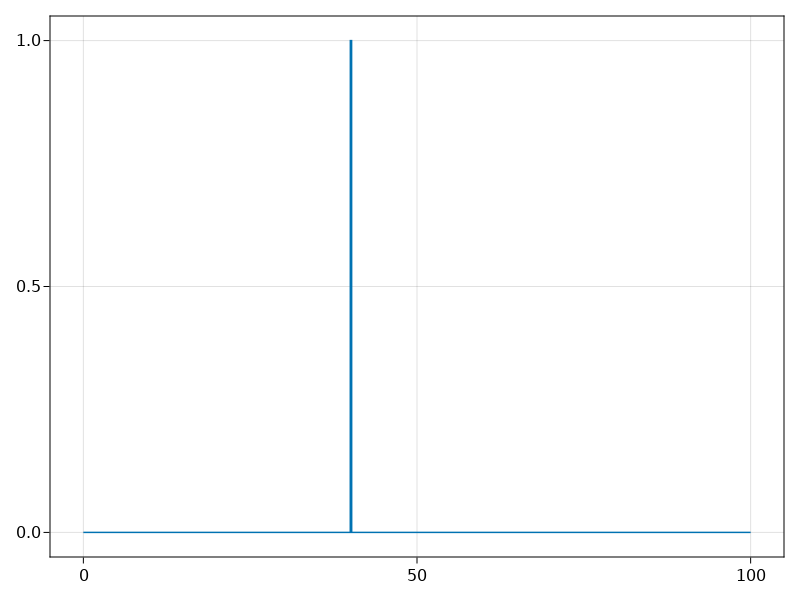

In [59]:
lines([0:0.01:100...], [40 < i <=40.2 ? 1 : 0 for i in 0:0.01:100])

In [2]:
using CairoMakie